Google colaboratory PRO 上で実行

# housekeeping

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! python --version

Python 3.9.16


In [2]:
!sudo pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 65.6 MB/s eta 0:00:00


In [3]:
!sudo pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.8 MB/s eta 0:00:00


In [4]:
! sudo pip install numpyro

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 kB 13.6 MB/s eta 0:00:00


In [5]:
! sudo pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=ba8196c0c08a471f54ca4febf2e7f53c2e5a665baf19bc89b9e58b2d264cb7de
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [6]:
! sudo pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 19.9 MB/s eta 0:00:00


In [7]:
! pip install pytorch-tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.13.1 w

In [8]:
import polars as pl
import numpy as np
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import sklearn.metrics
from functools import partial
import pickle
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import pymc as pm
import arviz as az
import pytensor.tensor as at
import numpyro
import jax
import pymc.sampling_jax as pmjax

import eli5
from eli5.sklearn import PermutationImportance

import shap
import json

# multilevel, shrinkage
from sklearn.preprocessing import StandardScaler
from collections import Counter

# tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from pytorch_tabnet.augmentations import ClassificationSMOTE

In [9]:
# lightgbm で使う num_threads の調査のため
import multiprocessing
multiprocessing.cpu_count()

4

In [10]:
# seed
RANDOM_SEED = 1013

In [16]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Apr 16 14:01:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    48W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


# 読み込み

データフレームに付けるヘッダーを作る

In [11]:
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
           'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
           'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3']

In [12]:
Soil_Type = ['Soil_Type']*40
int_series = np.arange(0, 40)

soils = pl.DataFrame({
    'Soil_Type': Soil_Type,
    'int_series': list(int_series)
})

soils = soils.with_columns(
    pl.concat_str([
        pl.col('Soil_Type'),
        pl.col('int_series')
        ], 
        separator='_'
    ).alias("Soil_Type's")
)

all_columns = columns \
    + list(np.concatenate(soils.select(pl.col("Soil_Type's")).to_numpy())) \
    + ['Cover_Type']
len(all_columns)

55

作ったヘッダーを、`covtype_copy.data` として新規作成したデータに付け加えるよう編集する

データを読み込む  
目的変数を -1 していることに注意

In [13]:
dtypes = dict(zip(all_columns, [int]*55))

# df = pl.read_csv('../data/covtype_copy.data', dtypes=dtypes)
df = pl.read_csv('./drive/MyDrive/Learning/CA_tech/data/covtype_copy.data', dtypes=dtypes)
df =\
df.select([
    pl.exclude('Cover_Type'),
    pl.col('Cover_Type')-1
    ])

# train, test 分割

In [14]:
X = df.select(pl.exclude('Cover_Type'))
y = df.select('Cover_Type')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
X_train, X_test, y_train, y_test = X_train.to_pandas(), X_test.to_pandas(), y_train.to_pandas(), y_test.to_pandas()

In [15]:
y_train_dummies = pd.get_dummies(np.concatenate(y_train.values))
y_train_dummies

,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
464804,0,1,0,0,0,0,0
464805,0,1,0,0,0,0,0
464806,0,0,0,0,0,1,0
464807,0,1,0,0,0,0,0


In [16]:
y_test_dummies = pd.get_dummies(np.concatenate(y_test.values))

# 問1. LightGBM

## 欠損値を確認する

In [31]:
# df.select(pl.col('*').is_nan())
df.to_pandas().isna().sum(axis=0)

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


## 異常な値が無いか確認

In [33]:
df.describe()

describe,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0,581012.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.00589,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.01506,1.051471
"""std""",279.984734,111.913721,7.488242,212.549356,58.295232,1559.25487,26.769889,19.768697,38.274529,1324.19521,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.01755,0.044387,0.230245,0.144579,0.221186,0.17059,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.03795,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.01431,0.022641,0.161508,0.152307,0.121791,1.396504
"""min""",1859.0,0.0,0.0,0.0,-173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""max""",3858.0,360.0,66.0,1397.0,601.0,7117.0,254.0,254.0,254.0,7173.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0
"""median""",2996.0,127.0,13.0,218.0,30.0,1997.0,218.0,226.0,143.0,1710.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"""25%""",2809.0,58.0,9.0,108.0,7.0,1106.0,198.0,213.0,119.0,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""75%""",3163.0,260.0,18.0,384.0,69.0,3328.0,231.0,237.0,168.0,2550.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

Hillshade_9am と Hillshade_Noon で 0 を取る値が存在するが、全体を占める割合は低いので問題は無さそう。

(array([ 76968., 126694., 105443.,  80440.,  63813.,  43214.,  34065.,
         30231.,  18353.,   1791.]),
 array([   0. ,  711.7, 1423.4, 2135.1, 2846.8, 3558.5, 4270.2, 4981.9,
        5693.6, 6405.3, 7117. ]),
 <BarContainer object of 10 artists>)

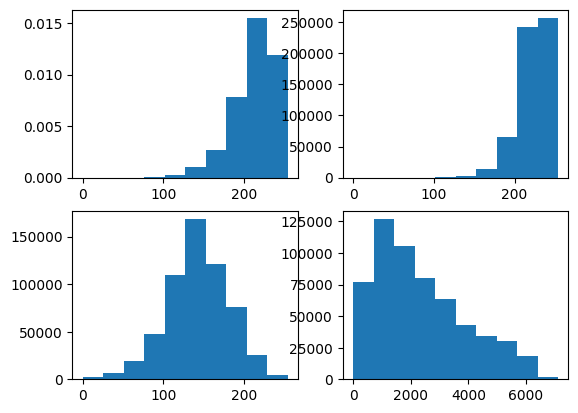

In [36]:
fig, ax = plt.subplots(2,2)
ax[0,0].hist(df.select('Hillshade_9am'), density=True)
ax[0,1].hist(df.select('Hillshade_Noon'))
ax[1,0].hist(df.select('Hillshade_3pm'))
ax[1,1].hist(df.select('Horizontal_Distance_To_Roadways'))

## Optuna でハイパーパラメータチューニングする



In [ ]:
def objective(trial, X_train, y_train):
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.25)
    dtrain = lgb.Dataset(train_x, label=train_y)

    param = {
        'objective': 'multiclass',
        'boosting': 'dart',
        'num_iterations': 100, #???
        # 'learning_rate': trial.suggest_int("learning_rate", 0.01, 0.1), #
        'num_leaves': trial.suggest_int("num_leaves", 2, 256), #
        'tree_learner': 'data',
        'num_threads': 4, 
        'seed': 1013,
        'bagging_fraction': trial.suggest_float("bagging_fraction", 0.4, 1.0), #
        'bagging_freq': trial.suggest_int("bagging_freq", 1, 7), #
        'bagging_seed': 1013,
        'feature_fraction': trial.suggest_float("feature_fraction", 0.4, 1.0), #
        'feature_fraction_seed': 1013,
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'drop_rate': 0.1, #???
        'drop_seed': 1013,
        'verbosity': -1,
        'min_data_in_leaf': trial.suggest_int("min_data_in_leaf", 5, 100), #
        'metric': 'multi_logloss',
        'num_class': 7
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(valid_x)
    rounded_labels = np.argmax(preds, axis=1)
    # pred_labels = np.rint(rounded_labels)
    accuracy = sklearn.metrics.accuracy_score(valid_y, rounded_labels)
    return accuracy


# f = partial(objective, X_train=X_train, y_train=y_train)
# study = optuna.create_study(direction="maximize")
# study.optimize(f, n_trials=100)

# print("Number of finished trials: {}".format(len(study.trials)))

# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))

# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

チューンしたパラメータを保存する.  
以下 pickle は、numpy==1.24.1 でないと開けないため、使用しない。  
--> numpy < 1.24 でないと numba が使えないため。

In [ ]:
# pickle.dump(study, open(f"optuna_lgb.pkl", 'wb')) 
# optuna_study = pickle.load(open(file=f'../data/optuna_lgb.pkl', mode='rb'))
# optuna_study.best_params

In [ ]:
"""
updated_params = {
    'objective': 'multiclass',
    'boosting': 'dart',
    'num_iterations': 100, #???
    # 'learning_rate': trial.suggest_int("learning_rate", 0.01, 0.1), #
    # 'num_leaves': trial.suggest_int("num_leaves", 2, 256), #
    'tree_learner': 'data',
    'num_threads': 4, 
    'seed': 1013,
    # 'bagging_fraction': trial.suggest_float("bagging_fraction", 0.4, 1.0), #
    # 'bagging_freq': trial.suggest_int("bagging_freq", 1, 7), #
    'bagging_seed': 1013,
    # 'feature_fraction': trial.suggest_float("feature_fraction", 0.4, 1.0), #
    'feature_fraction_seed': 1013,
    # 'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
    # 'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
    'drop_rate': 0.1, #???
    'drop_seed': 1013,
    'verbosity': -1,
    # 'min_data_in_leaf': trial.suggest_int("min_data_in_leaf", 5, 100), #
    'metric': 'multi_logloss',
    'num_class': 7
    }
updated_params.update(optuna_study.best_params)
updated_params
"""

'\nupdated_params = {\n    \'objective\': \'multiclass\',\n    \'boosting\': \'dart\',\n    \'num_iterations\': 100, #???\n    # \'learning_rate\': trial.suggest_int("learning_rate", 0.01, 0.1), #\n    # \'num_leaves\': trial.suggest_int("num_leaves", 2, 256), #\n    \'tree_learner\': \'data\',\n    \'num_threads\': 4, \n    \'seed\': 1013,\n    # \'bagging_fraction\': trial.suggest_float("bagging_fraction", 0.4, 1.0), #\n    # \'bagging_freq\': trial.suggest_int("bagging_freq", 1, 7), #\n    \'bagging_seed\': 1013,\n    # \'feature_fraction\': trial.suggest_float("feature_fraction", 0.4, 1.0), #\n    \'feature_fraction_seed\': 1013,\n    # \'lambda_l1\': trial.suggest_float(\'lambda_l1\', 1e-8, 10.0, log=True),\n    # \'lambda_l2\': trial.suggest_float(\'lambda_l2\', 1e-8, 10.0, log=True),\n    \'drop_rate\': 0.1, #???\n    \'drop_seed\': 1013,\n    \'verbosity\': -1,\n    # \'min_data_in_leaf\': trial.suggest_int("min_data_in_leaf", 5, 100), #\n    \'metric\': \'multi_logloss\',\n   

In [ ]:
# f = open("optuna_params.json", "w")
# json.dump(updated_params,f)
# f.close()

In [ ]:
f = open('/content/drive/MyDrive/Learning/CA_tech/data/optuna_params.json', "r")
updated_params = json.load(f)
f.close()
updated_params

{'objective': 'multiclass',
 'boosting': 'dart',
 'num_iterations': 100,
 'tree_learner': 'data',
 'num_threads': 4,
 'seed': 1013,
 'bagging_seed': 1013,
 'feature_fraction_seed': 1013,
 'drop_rate': 0.1,
 'drop_seed': 1013,
 'verbosity': -1,
 'metric': 'multi_logloss',
 'num_class': 7,
 'num_leaves': 256,
 'bagging_fraction': 0.7657196713371847,
 'bagging_freq': 7,
 'feature_fraction': 0.9863362932356322,
 'lambda_l1': 3.418204309170793e-06,
 'lambda_l2': 1.0803561007456372e-06,
 'min_data_in_leaf': 72}

## LightGBM で推論する

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.25, random_state=RANDOM_SEED)

dtrain = lgb.Dataset(train_x, label=train_y)
dvalid = lgb.Dataset(valid_x, label=valid_y, reference=dtrain)

evals = {}

gbm = lgb.train(
    params=updated_params, train_set=dtrain, valid_sets=[dtrain, dvalid], callbacks=[lgb.record_evaluation(evals)]
    )
preds = gbm.predict(X_test)
rounded_labels = np.argmax(preds, axis=1)
accuracy = sklearn.metrics.accuracy_score(y_test, rounded_labels)

accuracy


Found `num_iterations` in params. Will use it instead of argument


0.9337968899253892

lightgbmの構造を調べる


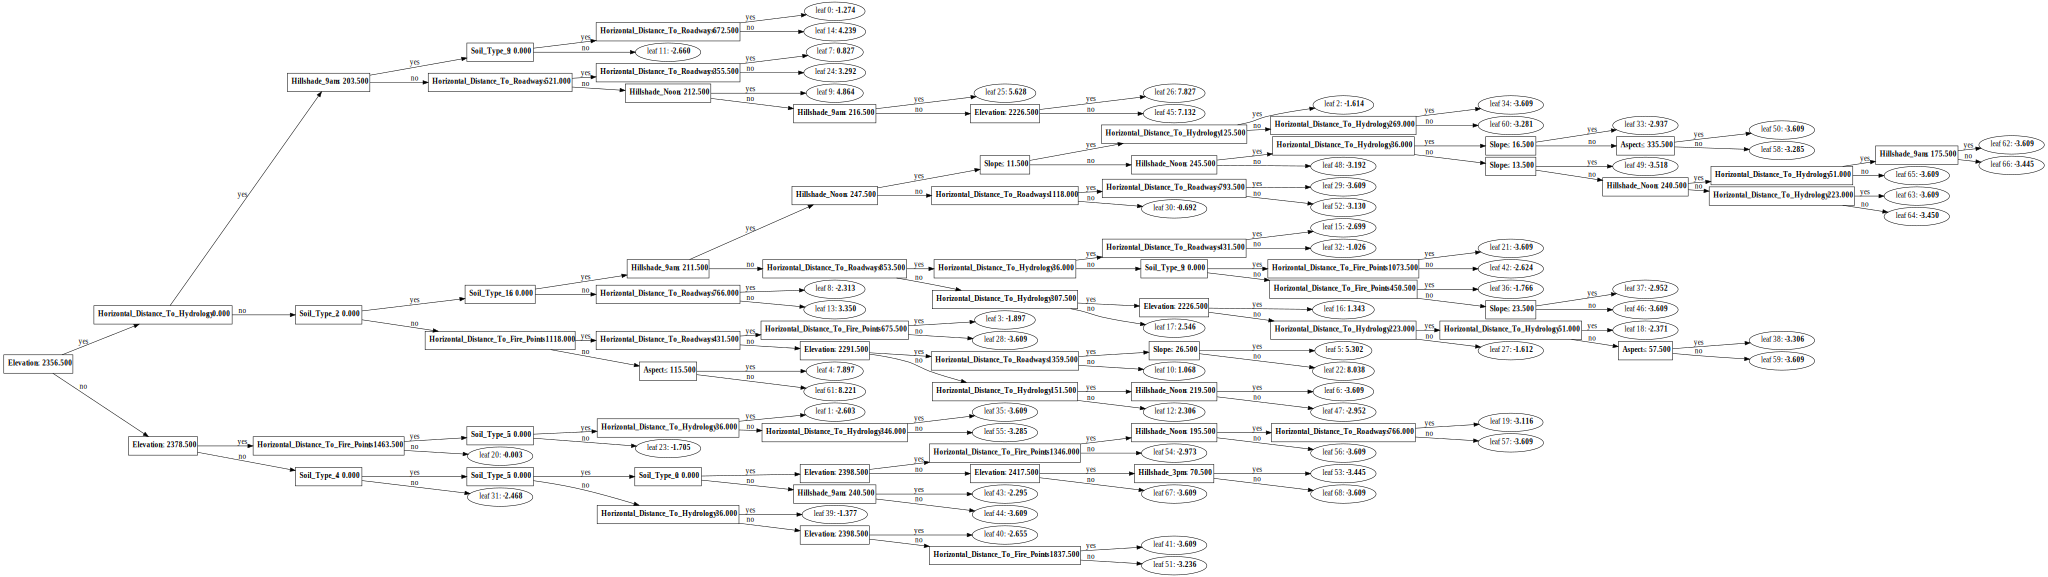

In [ ]:
lgb.create_tree_digraph(gbm, tree_index=3)

<Axes: >

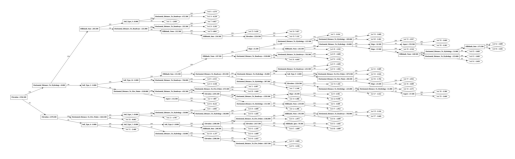

In [ ]:
lgb.plot_tree(gbm, tree_index=3)

## 学習曲線を描く

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

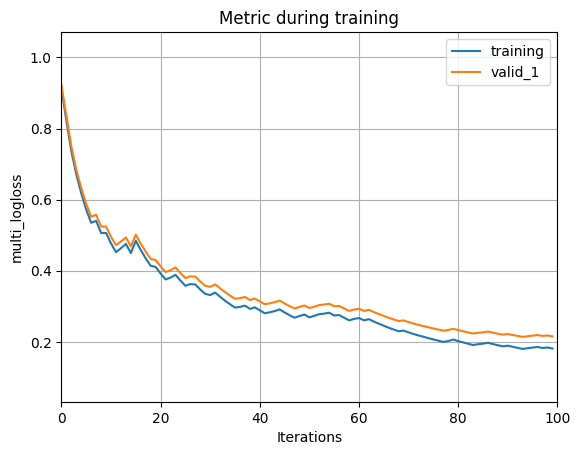

In [ ]:
lgb.plot_metric(booster=evals)

## 特徴量重要度を可視化

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

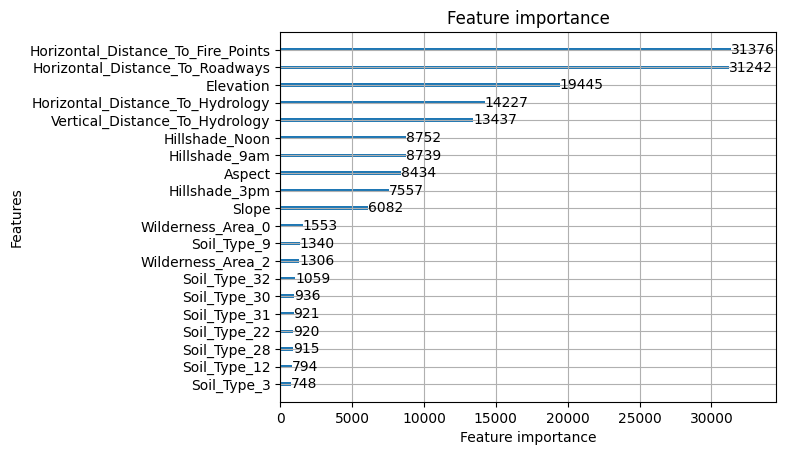

In [ ]:
lgb.plot_importance(gbm, max_num_features=20)

## shap を考察.  
以下のコードは、`train_test_split` の `test_size=0.20` としたコード

In [ ]:
# explainer = shap.TreeExplainer(gbm)
# shap_values = explainer.shap_values(train_x.iloc[:1000,:])

In [ ]:
# pickle.dump(explainer, open(f"/content/drive/MyDrive/Learning/CA_tech/data/shap_explainer.pkl", 'wb')) 
explainer = pickle.load(open(file=f'/content/drive/MyDrive/Learning/CA_tech/data/shap_explainer.pkl', mode='rb'))

In [ ]:
# pickle.dump(shap_values, open(f"/content/drive/MyDrive/Learning/CA_tech/data/shap_values.pkl", 'wb')) 
shap_values = pickle.load(open(file=f'/content/drive/MyDrive/Learning/CA_tech/data/shap_values.pkl', mode='rb'))

In [ ]:
shap_values[0].shape

(1000, 54)

In [ ]:
shap.initjs()
shap.force_plot(base_value=explainer.expected_value[0], shap_values=shap_values[0], features=train_x.iloc[:1000,:])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
shap.initjs()
shap.force_plot(base_value=explainer.expected_value[1], shap_values=shap_values[1][:1000,:], features=train_x.iloc[:1000,:])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
shap.initjs()
shap.force_plot(base_value=explainer.expected_value[2], shap_values=shap_values[2][:1000,:], features=train_x.iloc[:1000,:])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
shap.initjs()
shap.force_plot(base_value=explainer.expected_value[3], shap_values=shap_values[3][:1000,:], features=train_x.iloc[:1000,:])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
shap.initjs()
shap.force_plot(base_value=explainer.expected_value[4], shap_values=shap_values[4][:1000,:], features=train_x.iloc[:1000,:])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
shap.initjs()
shap.force_plot(base_value=explainer.expected_value[5], shap_values=shap_values[5][:1000,:], features=train_x.iloc[:1000,:])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
shap.initjs()
shap.force_plot(base_value=explainer.expected_value[6], shap_values=shap_values[6][:1000,:], features=train_x.iloc[:1000,:])

Output hidden; open in https://colab.research.google.com to view.

## permutation feature importance を考察

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.25, random_state=RANDOM_SEED)

dtrain = lgb.Dataset(train_x, label=train_y)
dvalid = lgb.Dataset(valid_x, label=valid_y, reference=dtrain)

evals = {}

gbm2 = lgb.LGBMClassifier(**updated_params)
gbm2.fit(train_x, train_y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] bagging_fraction is set=0.7657196713371847, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7657196713371847
[LightGBM] [Warning] feature_fraction is set=0.9863362932356322, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9863362932356322
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] lambda_l2 is set=1.0803561007456372e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0803561007456372e-06
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] lambda_l1 is set=3.418204309170793e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4

LGBMClassifier(bagging_fraction=0.7657196713371847, bagging_freq=7,
               bagging_seed=1013, boosting='dart', drop_rate=0.1,
               drop_seed=1013, feature_fraction=0.9863362932356322,
               feature_fraction_seed=1013, lambda_l1=3.418204309170793e-06,
               lambda_l2=1.0803561007456372e-06, metric='multi_logloss',
               min_data_in_leaf=72, num_class=7, num_iterations=100,
               num_leaves=256, num_threads=4, objective='multiclass', seed=1013,
               tree_learner='data', verbosity=-1)

In [ ]:
r = PermutationImportance(gbm2, random_state=RANDOM_SEED).fit(X_test, y_test)
eli5.show_weights(r, feature_names=X_test.columns.tolist())

Weight,Feature
0.4383 ± 0.0011,Elevation
0.1777 ± 0.0012,Horizontal_Distance_To_Roadways
0.1480 ± 0.0015,Horizontal_Distance_To_Fire_Points
0.0622 ± 0.0015,Horizontal_Distance_To_Hydrology
0.0526 ± 0.0009,Wilderness_Area_0
0.0334 ± 0.0008,Vertical_Distance_To_Hydrology
0.0294 ± 0.0003,Hillshade_Noon
0.0195 ± 0.0008,Hillshade_9am
0.0133 ± 0.0006,Aspect
0.0130 ± 0.0003,Wilderness_Area_2


# 問2

## データ探索

以下コードは明らかに無駄が多い。polars と pandas の互換コードを要勉強.  
また、chatGPT を使用した。（プロンプトは不明）.  
しかし、良く考えたら `np.argmax()` で書けそうなので、後ほど要修正

In [ ]:
# 元のデータフレームを読み込む
df_c = pd.read_csv('/content/drive/MyDrive/Learning/CA_tech/data/covtype_copy.data')
df_c_pl = pl.read_csv('/content/drive/MyDrive/Learning/CA_tech/data/covtype_copy.data')

# ダミー変数の列を削除し、重複を削除したユニークなカテゴリ値のリストを取得する
cat_values_wil = df_c.iloc[:,10:14].drop_duplicates().values.tolist()  # カテゴリ変数のユニークな値をリスト化
# 新しいカテゴリ変数列を作成する
wil = df_c.iloc[:,10:14].apply(lambda x: cat_values_wil.index(x.values.tolist()), axis=1).values  # カテゴリ変数の値をインデックスに変換

cat_values_soil = df_c.iloc[:,14:-1].drop_duplicates().values.tolist() 
soil = df_c.iloc[:,14:-1].apply(lambda x: cat_values_soil.index(x.values.tolist()), axis=1).values

cover = df_c.iloc[:,-1]

df_new = pl.DataFrame({
    'Wilderness_Areas': wil,
    'Soil_Types': soil,
    'Cover_Type': cover-1
})

df_old = df_c_pl[:,0:10]
df_cat = pl.concat([df_old, df_new], how='horizontal')
df_cat

Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Areas,Soil_Types,Cover_Type
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
2596,51,3,258,0,510,221,232,148,6279,0,0,4
2590,56,2,212,-6,390,220,235,151,6225,0,0,4
2804,139,9,268,65,3180,234,238,135,6121,0,1,1
2785,155,18,242,118,3090,238,238,122,6211,0,2,1
2595,45,2,153,-1,391,220,234,150,6172,0,0,4
2579,132,6,300,-15,67,230,237,140,6031,0,0,1
2606,45,7,270,5,633,222,225,138,6256,0,0,4
2605,49,4,234,7,573,222,230,144,6228,0,0,4
2617,45,9,240,56,666,223,221,133,6244,0,0,4


In [ ]:
df_wil = df_cat.groupby('Wilderness_Areas')\
.agg([
    pl.count(),
    pl.col('Horizontal_Distance_To_Roadways'),
    pl.col('Horizontal_Distance_To_Fire_Points'),
    pl.col('Elevation'),
    pl.col('Horizontal_Distance_To_Hydrology'),
    pl.col('Aspect'),
    pl.col('Slope'),
    pl.col('Cover_Type'),
])

df_wil = df_wil.sort('Wilderness_Areas')

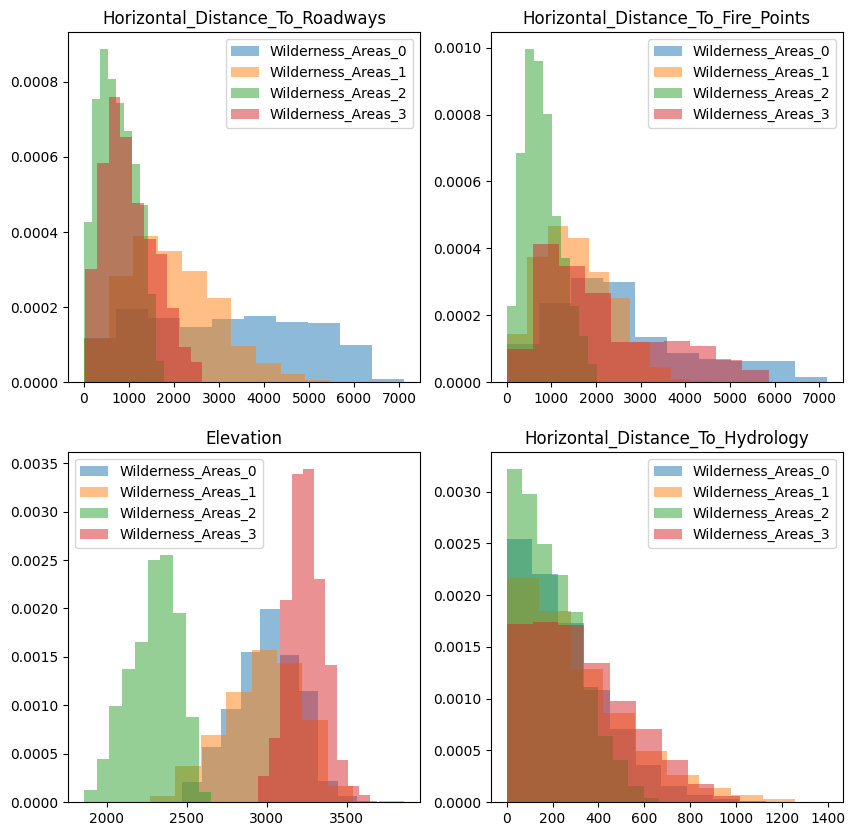

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10),
                      ncols=2, nrows=2, sharex=False, sharey=False)
for index, data in df_wil.to_pandas().iterrows():
    ax[0,0].hist(data['Horizontal_Distance_To_Roadways'], density=True, alpha=0.5, label=f'Wilderness_Areas_{index}')
    ax[0,0].legend()
    ax[0,0].set_title('Horizontal_Distance_To_Roadways')

for index, data in df_wil.to_pandas().iterrows():
    ax[0,1].hist(data['Horizontal_Distance_To_Fire_Points'], density=True, alpha=0.5, label=f'Wilderness_Areas_{index}')
    ax[0,1].legend()
    ax[0,1].set_title('Horizontal_Distance_To_Fire_Points')

for index, data in df_wil.to_pandas().iterrows():
    ax[1,0].hist(data['Elevation'], density=True, alpha=0.5, label=f'Wilderness_Areas_{index}')
    ax[1,0].legend()
    ax[1,0].set_title('Elevation')

for index, data in df_wil.to_pandas().iterrows():
    ax[1,1].hist(data['Horizontal_Distance_To_Hydrology'], density=True, alpha=0.5, label=f'Wilderness_Areas_{index}')
    ax[1,1].legend()
    ax[1,1].set_title('Horizontal_Distance_To_Hydrology')

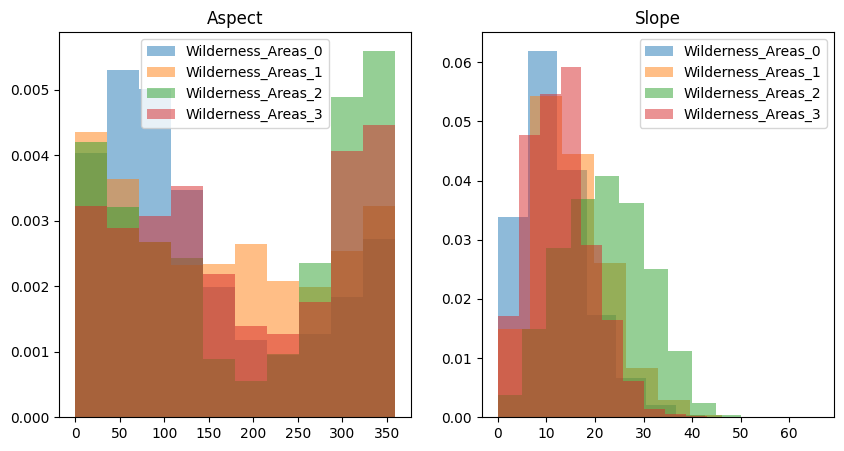

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5),
                      ncols=2, nrows=1, sharex=False, sharey=False)
for index, data in df_wil.to_pandas().iterrows():
    ax[0].hist(data['Aspect'], density=True, alpha=0.5, label=f'Wilderness_Areas_{index}')
    ax[0].legend()
    ax[0].set_title('Aspect')

for index, data in df_wil.to_pandas().iterrows():
    ax[1].hist(data['Slope'], density=True, alpha=0.5, label=f'Wilderness_Areas_{index}')
    ax[1].legend()
    ax[1].set_title('Slope')

Wilderness_Area 0: 2    146197
1    105717
7      5101
5      3781
dtype: int64

Wilderness_Area 1: 2    125093
1     87528
3     14300
7     13105
6      7626
5      5712
dtype: int64

Wilderness_Area 2: 3    21454
6     9741
2     3026
4     2747
dtype: int64

Wilderness_Area 3: 1    18595
2     8985
7     2304
dtype: int64



Text(0.5, 1.0, 'Cover_Type')

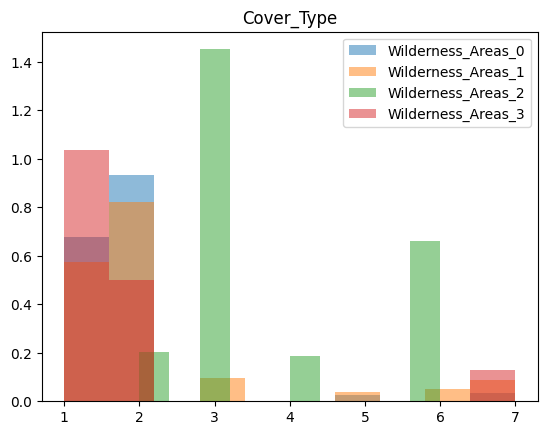

In [ ]:
fig, ax = plt.subplots()
for index, data in df_wil.to_pandas().iterrows():
    ax.hist(data['Cover_Type'], density=True, alpha=0.5, label=f'Wilderness_Areas_{index}')
    ax.legend()
    print(f"Wilderness_Area {data['Wilderness_Areas']}: {pd.Series(data['Cover_Type']).value_counts()}")
    print('')
ax.set_title('Cover_Type')

カテゴリ化したデータフレームを保存する

In [ ]:
# df_cat.write_csv('/content/drive/MyDrive/Learning/CA_tech/data/df_cat.csv')

# multilevel 

In [ ]:
# df_cat = pd.read_csv('./data/df_cat.csv')
df_cat = pd.read_csv('./drive/MyDrive/Learning/CA_tech/data/df_cat.csv')
X = df_cat.drop(['Cover_Type'], axis=1)
y = df_cat['Cover_Type']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED) # 元々0.99

In [ ]:
df = pl.read_csv('./drive/MyDrive/Learning/CA_tech/data/covtype_copy.data', dtypes=dtypes)
df =\
df.select([
    pl.exclude('Cover_Type'),
    pl.col('Cover_Type')-1
    ])
df = df.to_pandas() # 後ほど pandas として使うので変換
X = df.drop(['Cover_Type'], axis=1)
y = df['Cover_Type']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED) # 元々0.99

In [ ]:
y_train2_dummies = pd.get_dummies(y_train2)
y_train2_dummies.values.sum(axis=0)

array([169490, 226577,  28558,   2222,   7645,  13904,  16413],
      dtype=uint64)

In [ ]:
y_test2_dummies = pd.get_dummies(y_test2)
y_test2_dummies.values.sum(axis=0)

array([42350, 56724,  7196,   525,  1848,  3463,  4097], dtype=uint64)

In [ ]:
Wilderness_names = X_train3.iloc[0:2, -44:-40].columns.values
Wilderness_names

array(['Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2',
       'Wilderness_Area_3'], dtype=object)

In [ ]:
scaler = StandardScaler()
X_train2_ss = scaler.fit_transform(X_train2[['Elevation', 'Horizontal_Distance_To_Roadways',
                                             'Horizontal_Distance_To_Fire_Points']])

In [ ]:
# 上手くいくコード
COORDS = {'Wil': Wilderness_names}

with pm.Model(coords=COORDS) as multimodel:
    # data
    elevation = pm.MutableData('elevation', X_train2_ss[:,0])
    Wil_ind = pm.MutableData('Wil_ind', X_train2['Wilderness_Areas'].values)
    y = pm.MutableData('y', y_train2_dummies.values)

    # priors
    sigma_a = pm.HalfCauchy('sigma_a', 0.5)
    mu_a = pm.Normal('mu_a', mu=0, sigma=1)
    mu_b = pm.Normal("mu_b", mu=0, sigma=1)
    sigma_b = pm.HalfCauchy("sigma_b", 0.5)

    # Random intercept
    alpha = pm.Normal('alpha', mu=mu_a, sigma=sigma_a, dims='Wil')
    # Random slopes
    beta = pm.Normal("beta", mu=mu_b, sigma=sigma_b, dims='Wil')

    
    # data likelihood
    logit_y = alpha[Wil_ind] + pm.math.dot(elevation, beta[Wil_ind])
    p_y = pm.math.softmax(logit_y, axis=-1)
    y_obs = pm.Categorical('y_obs', p=p_y, observed=y)


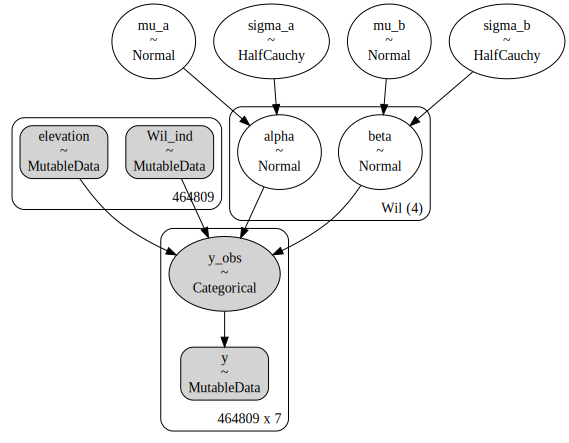

In [ ]:
pm.model_to_graphviz(multimodel)

In [ ]:
with multimodel:
    multimodel_trace = pmjax.sample_numpyro_nuts(tune=2000, chains=2, random_seed=RANDOM_SEED)

Compiling...


There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.


Compilation time =  0:00:34.960713
Sampling...


sample: 100%|██████████| 3000/3000 [2:22:41<00:00,  2.85s/it, 9 steps of size 1.77e-02. acc. prob=0.68]  


Sampling time =  6:24:03.518489
Transforming variables...
Transformation time =  0:00:00.128729


array([[<Axes: title={'center': 'mu_a'}>,
        <Axes: title={'center': 'mu_a'}>],
       [<Axes: title={'center': 'mu_b'}>,
        <Axes: title={'center': 'mu_b'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma_a'}>,
        <Axes: title={'center': 'sigma_a'}>],
       [<Axes: title={'center': 'sigma_b'}>,
        <Axes: title={'center': 'sigma_b'}>]], dtype=object)

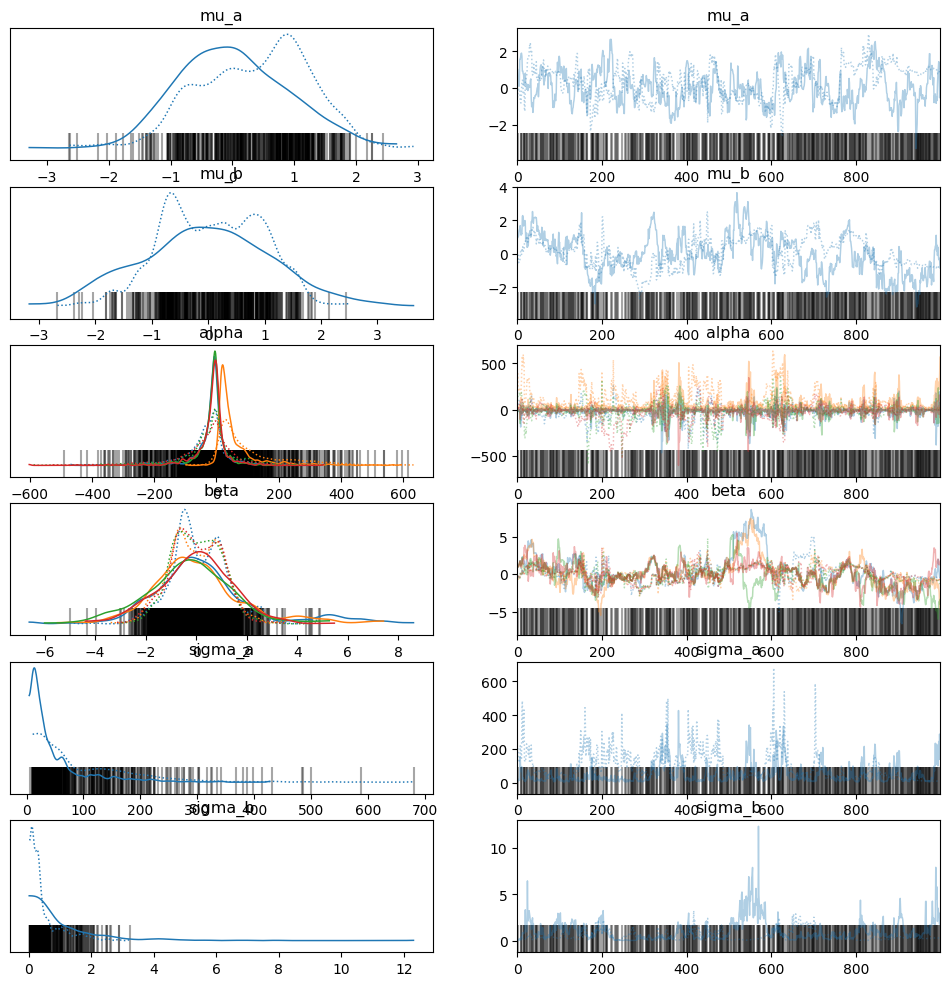

In [ ]:
az.plot_trace(multimodel_trace)

In [ ]:
az.summary(multimodel_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_a,0.196,0.912,-1.389,1.817,0.106,0.075,77.0,276.0,1.03
mu_b,0.017,1.035,-2.108,1.686,0.191,0.136,30.0,74.0,1.03
alpha[Wilderness_Area_0],-24.625,70.496,-182.694,118.841,4.108,7.896,304.0,154.0,1.12
alpha[Wilderness_Area_1],84.072,101.643,-13.020,314.663,18.012,12.855,35.0,185.0,1.06
alpha[Wilderness_Area_2],-20.632,81.716,-223.312,119.522,7.336,8.801,137.0,73.0,1.09
alpha[Wilderness_Area_3],-24.885,81.545,-180.222,141.788,8.656,6.904,121.0,96.0,1.11
beta[Wilderness_Area_0],0.250,1.757,-3.955,2.883,0.335,0.311,30.0,20.0,1.05
beta[Wilderness_Area_1],0.031,1.536,-3.035,2.553,0.263,0.223,36.0,32.0,1.05
beta[Wilderness_Area_2],-0.138,1.380,-2.700,2.654,0.309,0.263,20.0,19.0,1.09
beta[Wilderness_Area_3],-0.023,1.237,-2.440,2.198,0.189,0.144,43.0,61.0,1.04


In [ ]:
X_test2_ss = scaler.fit_transform(X_test2[['Elevation', 'Horizontal_Distance_To_Roadways',
                                             'Horizontal_Distance_To_Fire_Points']])

In [ ]:
with multimodel:
  pm.set_data({'elevation': X_test2_ss[:10000,0], 'Wil_ind': X_test2['Wilderness_Areas'].values[:10000],
               'y': y_test2_dummies.values[:10000]})
  multimodel_trace.extend(pm.sample_posterior_predictive(multimodel_trace))

In [ ]:
multimodel_trace.posterior_predictive['y_obs'].mean(dim=["chain", "draw"])

<xarray.DataArray 'y_obs' (y_obs_dim_2: 10000, y_obs_dim_3: 7)>
array([[5005.8345, 4967.3505, 4931.0355, ..., 5057.237 , 5115.233 ,
        5001.826 ],
       [4963.5775, 4919.8675, 4945.38  , ..., 5072.108 , 4983.088 ,
        5125.482 ],
       [5084.902 , 4994.9845, 5010.2485, ..., 5089.2385, 5002.897 ,
        4992.968 ],
       ...,
       [5082.3165, 4820.4215, 5001.9265, ..., 5061.194 , 5055.2725,
        4940.0725],
       [5039.141 , 4950.4615, 5060.052 , ..., 4918.5445, 5004.0055,
        4921.0335],
       [5055.192 , 5075.3145, 4912.242 , ..., 4979.047 , 5024.961 ,
        5060.143 ]])
Coordinates:
  * y_obs_dim_2  (y_obs_dim_2) int64 0 1 2 3 4 5 ... 9995 9996 9997 9998 9999
  * y_obs_dim_3  (y_obs_dim_3) int64 0 1 2 3 4 5 6

In [ ]:
np.mean(np.argmax(multimodel_trace.posterior_predictive['y_obs'].mean(dim=["chain", "draw"]).values, axis=1) == y_test2.values[:10000])

0.1403

# 縮小事前分布（正則化）

In [ ]:
COORDS = {
    'preds': X_train3.columns.values,
    'class': list(np.ones(7)),
    # 'obs_id': list(np.ones(len(X_train)))
    }
with pm.Model(coords=COORDS) as shrinkage:
    X = pm.MutableData('X', X_train3)
    y = pm.MutableData('y', y_train3)
    n = X.get_value().shape[0]
    p = X.get_value().shape[1]

    # local shirinkage param
    lam_k = pm.HalfCauchy('lam_k', 2, dims=('preds','class'))
    
    # global shrinkage param
    tau2 = pm.HalfCauchy('tau2', beta=2)

    # prior
    sigma2 = pm.InverseGamma("sigma", alpha=1, beta=1)
    beta = pm.Normal('beta', mu=0, 
                     sigma=lam_k * at.sqrt(tau2) * at.sqrt(sigma2),
                    dims=('preds','class'))
    alpha = pm.Normal('alpha', 0, 1000)
    
    # likelihood
    mu = alpha + at.dot(X, beta)
    # link function
    # p_y = pm.Deterministic('p_y', pm.math.softmax(mu, axis=-1))
    y_like = pm.Categorical('y_like', logit_p=mu, observed=y)

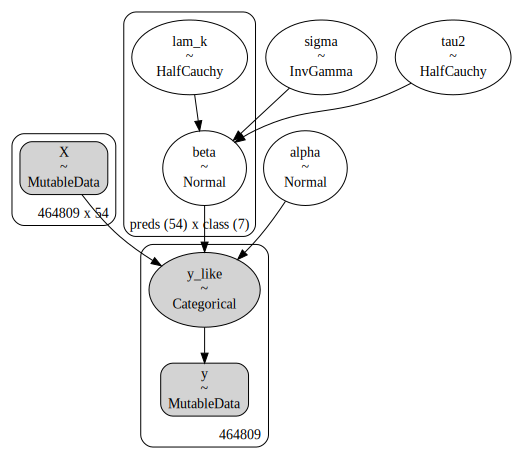

In [ ]:
pm.model_to_graphviz(shrinkage)

In [ ]:
with shrinkage:
    shrinkage_trace = pmjax.sample_numpyro_nuts(tune=2000, chains=2, random_seed=RANDOM_SEED)

Compiling...


There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.


Compilation time =  0:00:59.217005
Sampling...


sample: 100%|██████████| 3000/3000 [00:08<00:00, 336.65it/s, 1 steps of size 2.23e-308. acc. prob=0.00]


Sampling time =  0:00:43.166328
Transforming variables...
Transformation time =  0:00:00.247758


Your data appears to have a single value or no finite values
Your data appears to have a single value or no finite values
Your data appears to have a single value or no finite values
Your data appears to have a single value or no finite values
Your data appears to have a single value or no finite values


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'lam_k'}>,
        <Axes: title={'center': 'lam_k'}>],
       [<Axes: title={'center': 'tau2'}>,
        <Axes: title={'center': 'tau2'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

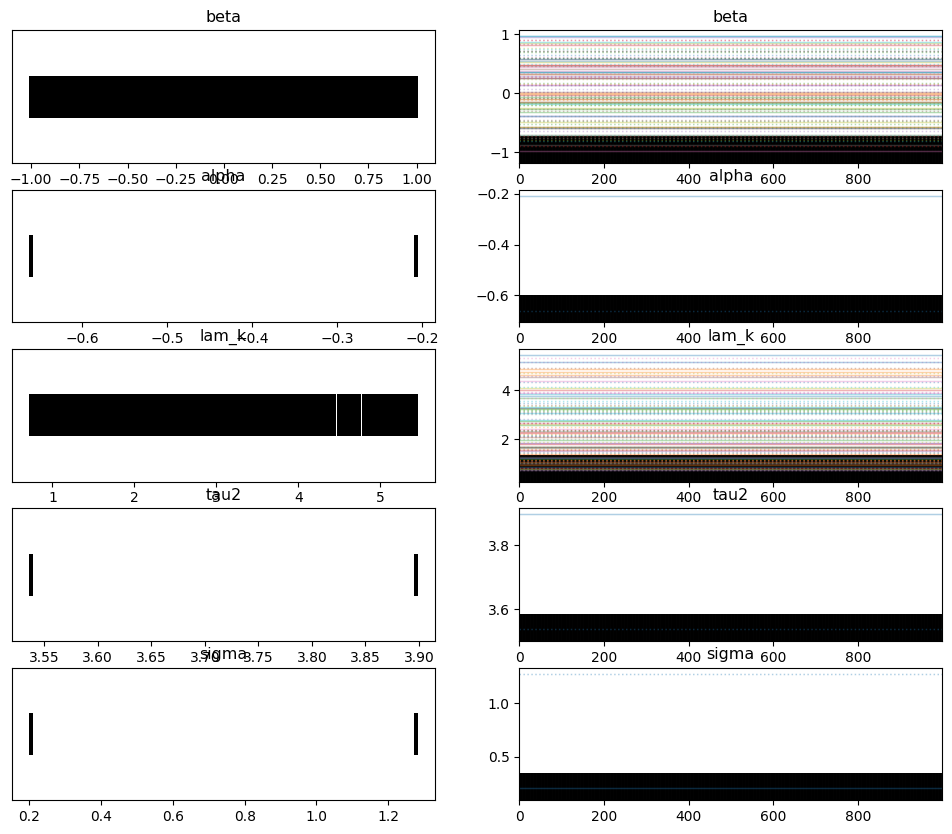

In [ ]:
az.plot_trace(shrinkage_trace)

In [ ]:
with shrinkage:
  pm.set_data({'X': X_test3, 'y': y_test3})
  shrinkage_trace.extend(pm.sample_posterior_predictive(shrinkage_trace))

以下のコードは chatGPT を使用.  
プロンプト：行ごとに一番出現頻度が高い値を抽出するコードをpythonで書いて.  

In [ ]:
y_like = []

for row in shrinkage_trace.posterior_predictive["y_like"][0].T.values:
    # 各要素の出現回数をカウントする
    counts = Counter(row)
    # 最頻値を抽出する
    most_common = counts.most_common(1)
    y_like.append(most_common[0][0])

In [ ]:
np.mean(np.array(y_like) == y_test2)

0.3598271989535554

# Tabnet

In [15]:
np.random.seed(RANDOM_SEED)

In [16]:
df = pl.read_csv('./drive/MyDrive/Learning/CA_tech/data/covtype_copy.data', dtypes=dtypes)
df =\
df.select([
    pl.exclude('Cover_Type'),
    pl.col('Cover_Type')-1
    ])
X = df.select(pl.exclude('Cover_Type'))
y = df.select('Cover_Type')
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

## hyperparameter tuning


In [44]:
aug = ClassificationSMOTE(p=0.2)
train_x, valid_x, train_y, valid_y = train_test_split(X_train3.to_numpy(), y_train3.to_numpy(), test_size=0.25)

def Objective(trial):
    n_da = trial.suggest_int("n_da", 32, 64, step=1)
    n_steps = trial.suggest_int("n_steps", 3, 10, step=1)
    gamma = trial.suggest_float("gamma", 1.0, 2.0)
    n_independent = trial.suggest_int("n_independent", 1, 5, step=1)
    n_shared = trial.suggest_int("n_shared", 1, 5, step=1)
    lambda_sparse = 1e-4
    momentum = 0.01
    clip_value = 2.
    optimizer_fn=torch.optim.Adam
    optimizer_params = dict(lr=2e-2)
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20}
    scheduler_fn=torch.optim.lr_scheduler.StepLR

    tabnet_params = dict(
        n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma, n_independent=n_independent, 
        n_shared=n_shared, lambda_sparse=lambda_sparse, momentum=momentum,
        clip_value=clip_value, optimizer_fn=optimizer_fn, optimizer_params=optimizer_params,
        scheduler_fn=scheduler_fn, scheduler_params=scheduler_params,
        seed=RANDOM_SEED
    )
    clf = TabNetClassifier(**tabnet_params)

    clf.fit(
    X_train=train_x, y_train=train_y,
    eval_set=[(train_x, train_y), (valid_x, valid_y)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy', 'logloss'],
    max_epochs=100, 
    patience=100,
    batch_size=16384, 
    virtual_batch_size=256,
    augmentations=aug
    ) 

    return clf.best_cost


# study = optuna.create_study(direction="minimize", study_name='TabNet optimization')
# study.optimize(Objective, timeout=12*60)


[I 2023-04-16 15:36:20,626] A new study created in memory with name: TabNet optimization
Device used : cuda


epoch 0  | loss: 3.84664 | train_accuracy: 0.33799 | train_logloss: 4.9892  | valid_accuracy: 0.33666 | valid_logloss: 4.99976 |  0:00:34s
epoch 1  | loss: 1.67085 | train_accuracy: 0.46196 | train_logloss: 6.13821 | valid_accuracy: 0.46223 | valid_logloss: 6.12569 |  0:01:08s
epoch 2  | loss: 1.37299 | train_accuracy: 0.36543 | train_logloss: 8.10682 | valid_accuracy: 0.36564 | valid_logloss: 8.10346 |  0:01:43s
epoch 3  | loss: 0.94861 | train_accuracy: 0.0354  | train_logloss: 12.26852| valid_accuracy: 0.03504 | valid_logloss: 12.26385|  0:02:17s
epoch 4  | loss: 1.08481 | train_accuracy: 0.33054 | train_logloss: 3.30306 | valid_accuracy: 0.33051 | valid_logloss: 3.29991 |  0:02:51s
epoch 5  | loss: 1.00547 | train_accuracy: 0.04068 | train_logloss: 8.44987 | valid_accuracy: 0.04092 | valid_logloss: 8.43606 |  0:03:25s
epoch 6  | loss: 0.84265 | train_accuracy: 0.05489 | train_logloss: 5.7083  | valid_accuracy: 0.05489 | valid_logloss: 5.71313 |  0:03:58s
epoch 7  | loss: 0.79395 | 

Best weights from best epoch are automatically used!
[I 2023-04-16 16:33:22,760] Trial 0 finished with value: 0.5929649894701929 and parameters: {'n_da': 55, 'n_steps': 9, 'gamma': 1.5778130253259612, 'n_independent': 5, 'n_shared': 5}. Best is trial 0 with value: 0.5929649894701929.


In [51]:
# 保存する
# pickle.dump(study, open('/content/drive/MyDrive/Learning/CA_tech/data/optuna_tabnet_study.pkl', 'wb')) 
optuna_study = pickle.load(open(file=f'/content/drive/MyDrive/Learning/CA_tech/data/optuna_tabnet_study.pkl', mode='rb'))
optuna_study.best_params

{'n_da': 55,
 'n_steps': 9,
 'gamma': 1.5778130253259612,
 'n_independent': 5,
 'n_shared': 5}

In [45]:
TabNet_params = optuna_study.best_params

In [54]:
final_params = dict(
        n_d=TabNet_params['n_da'], n_a=TabNet_params['n_da'], n_steps=TabNet_params['n_steps'], 
        gamma=TabNet_params['gamma'], n_independent=TabNet_params['n_independent'],
        n_shared=TabNet_params['n_shared'], lambda_sparse = 1e-4, momentum = 0.01, 
        clip_value=2., optimizer_fn=torch.optim.Adam, optimizer_params = dict(lr=2e-2), 
        scheduler_params = {"gamma": 0.95, "step_size": 20}, 
        scheduler_fn=torch.optim.lr_scheduler.StepLR, seed=RANDOM_SEED
    )


In [55]:
final_params

{'n_d': 55,
 'n_a': 55,
 'n_steps': 9,
 'gamma': 1.5778130253259612,
 'n_independent': 5,
 'n_shared': 5,
 'lambda_sparse': 0.0001,
 'momentum': 0.01,
 'clip_value': 2.0,
 'optimizer_fn': torch.optim.adam.Adam,
 'optimizer_params': {'lr': 0.02},
 'scheduler_params': {'gamma': 0.95, 'step_size': 20},
 'scheduler_fn': torch.optim.lr_scheduler.StepLR,
 'seed': 1013}

## 学習


In [56]:
aug = ClassificationSMOTE(p=0.2)
train_x, valid_x, train_y, valid_y = train_test_split(X_train3.to_numpy(), y_train3.to_numpy(), test_size=0.25)

clf = TabNetClassifier(**final_params)

clf.fit(
    X_train=train_x, y_train=train_y,
    eval_set=[(train_x, train_y), (valid_x, valid_y)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy', 'logloss'],
    max_epochs=200, 
    patience=100,
    batch_size=16384, 
    virtual_batch_size=256,
    augmentations=aug
  ) 

Device used : cuda


epoch 0  | loss: 3.84664 | train_accuracy: 0.33799 | train_logloss: 4.9892  | valid_accuracy: 0.33666 | valid_logloss: 4.99976 |  0:00:34s
epoch 1  | loss: 1.67085 | train_accuracy: 0.46196 | train_logloss: 6.13821 | valid_accuracy: 0.46223 | valid_logloss: 6.12569 |  0:01:08s
epoch 2  | loss: 1.37299 | train_accuracy: 0.36543 | train_logloss: 8.10682 | valid_accuracy: 0.36564 | valid_logloss: 8.10346 |  0:01:42s
epoch 3  | loss: 0.94861 | train_accuracy: 0.0354  | train_logloss: 12.26852| valid_accuracy: 0.03504 | valid_logloss: 12.26385|  0:02:17s
epoch 4  | loss: 1.08481 | train_accuracy: 0.33054 | train_logloss: 3.30306 | valid_accuracy: 0.33051 | valid_logloss: 3.29991 |  0:02:51s
epoch 5  | loss: 1.00547 | train_accuracy: 0.04068 | train_logloss: 8.44987 | valid_accuracy: 0.04092 | valid_logloss: 8.43606 |  0:03:26s
epoch 6  | loss: 0.84265 | train_accuracy: 0.05489 | train_logloss: 5.7083  | valid_accuracy: 0.05489 | valid_logloss: 5.71313 |  0:04:00s
epoch 7  | loss: 0.79395 | 

Best weights from best epoch are automatically used!


## モデルの保存と読込

In [ ]:
# 保存
# saved_filename = clf.save_model('/content/drive/MyDrive/Learning/CA_tech/data/tabnet_model')

Successfully saved model at /content/drive/MyDrive/Learning/CA_tech/data/tabnet_model.zip


In [19]:
# 読込
loaded_clf = TabNetClassifier()
loaded_clf.load_model('/content/drive/MyDrive/Learning/CA_tech/data/tabnet_model.zip')

In [ ]:
# 確認
y_pred = clf.predict(X_test)
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f"FINAL TEST SCORE FOR THE DATASET : {test_acc}")

In [ ]:
# 確認
assert(test_acc == loaded_test_acc)

## 可視化

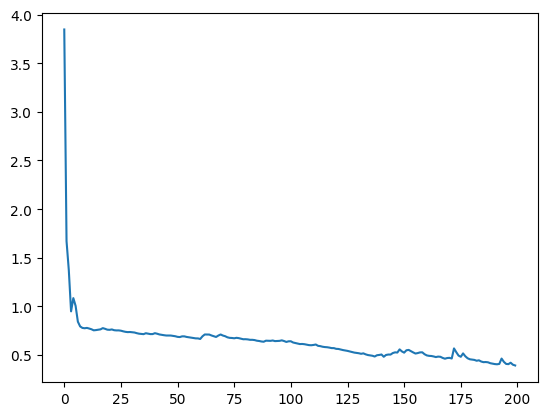

In [57]:
plt.plot(clf.history['loss'])

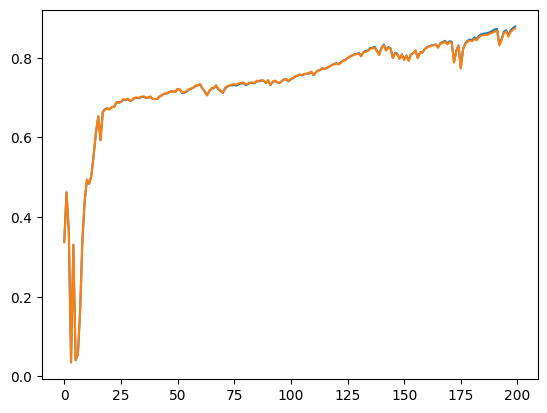

In [58]:
plt.plot(clf.history['train_accuracy'])
plt.plot(clf.history['valid_accuracy'])

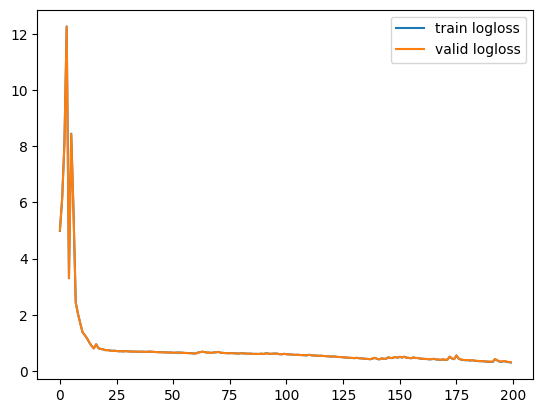

In [66]:
fig, ax = plt.subplots()
ax.plot(clf.history['train_logloss'], label='train logloss')
ax.plot(clf.history['valid_logloss'], label='valid logloss')
plt.legend()

## 予測

In [ ]:
preds_mapper = { idx : class_name for idx, class_name in enumerate(clf.classes_)}

preds = clf.predict_proba(X_test3.to_numpy())

y_pred = np.vectorize(preds_mapper.get)(np.argmax(preds, axis=1))

test_acc = accuracy_score(y_pred=y_pred, y_true=y_test3.to_numpy())

print(f"BEST VALID SCORE FOR THE DATASET : {max(clf.history['valid_accuracy'])}")
print(f"FINAL TEST SCORE FOR THE DATASET : {test_acc}")

BEST VALID SCORE FOR THE DATASET : 0.8741856922798895
FINAL TEST SCORE FOR THE DATASET : 0.8731013829247093


In [78]:
# y_pred = loaded_clf.predict(X_test3.to_numpy())
# test_acc = accuracy_score(y_pred=y_pred, y_true=y_test3.to_numpy())
# print(f"FINAL TEST SCORE FOR THE DATASET : {test_acc}")

FINAL TEST SCORE FOR THE DATASET : 0.8731013829247093


## 解釈性

In [86]:
# 特徴量重要度
clf.feature_importances_

array([2.90280374e-01, 0.00000000e+00, 2.11532952e-03, 1.06944940e-02,
       6.04146229e-03, 2.33082554e-03, 0.00000000e+00, 2.32716678e-02,
       0.00000000e+00, 4.57244124e-02, 3.01138059e-02, 1.19657351e-03,
       3.91582056e-02, 1.69011733e-02, 0.00000000e+00, 0.00000000e+00,
       1.95416948e-05, 1.22066813e-02, 2.59339289e-05, 0.00000000e+00,
       1.69601306e-04, 5.39354252e-03, 3.35290475e-07, 7.36922985e-03,
       0.00000000e+00, 1.69954723e-02, 1.09777234e-02, 5.40345632e-02,
       0.00000000e+00, 8.40866206e-10, 1.30357721e-02, 1.62146591e-03,
       6.12574204e-03, 1.21517560e-03, 0.00000000e+00, 0.00000000e+00,
       1.43072686e-03, 6.56068950e-04, 0.00000000e+00, 5.12108059e-06,
       8.52900750e-05, 1.34177126e-01, 3.53596467e-02, 0.00000000e+00,
       7.37982899e-03, 3.74443981e-03, 6.72736716e-03, 1.79512526e-01,
       0.00000000e+00, 0.00000000e+00, 2.08482970e-03, 2.72573539e-02,
       9.12854645e-04, 3.64771579e-03])

In [114]:
# 特徴量重要度
df_feature_importance = pd.DataFrame(dict(zip(X_train3.columns, clf.feature_importances_)), index=[0]).stack()
df_feature_importance = df_feature_importance.reset_index().drop(['level_0'], axis=1)
df_feature_importance = df_feature_importance.sort_values(by=0, ascending=False)
df_feature_importance

,level_1,0
0,Elevation,2.902804e-01
47,Soil_Type_33,1.795125e-01
41,Soil_Type_27,1.341771e-01
27,Soil_Type_13,5.403456e-02
9,Horizontal_Distance_To_Fire_Points,4.572441e-02
12,Wilderness_Area_2,3.915821e-02
42,Soil_Type_28,3.535965e-02
10,Wilderness_Area_0,3.011381e-02
51,Soil_Type_37,2.725735e-02
7,Hillshade_Noon,2.327167e-02


# 参照

以下のサイトを参照した。   
- [Optuna 公式の Light GBM 用 hyperparameter tuning 実例](https://github.com/optuna/optuna-examples/blob/main/lightgbm/lightgbm_simple.py)
- [Tabnet の公式実例集（多クラス分類）](https://github.com/dreamquark-ai/tabnet/blob/develop/forest_example.ipynb)